# Towyo Data Visualization Example

This notebook demonstrates how to visualize towyo oceanographic data using the oceanvis-py package.

We'll work with the M212 towyo data to create section plots showing conservative temperature (CT) and absolute salinity (SA) with sigma2 density contours.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Import oceanvis_py plotting functions
from oceanvis_py.plots import plot_section, plot_dual_section
from oceanvis_py.core import get_oceanographic_colormap

In [2]:
# Load the towyo data
data_path = Path.cwd().parent / "data" / "m212_072_towyo_interpolated.nc"
ds = xr.open_dataset(data_path)

# Display basic info about the dataset
print("Dataset dimensions:")
print(ds.dims)
print("\nDataset variables:")
print(list(ds.data_vars.keys()))
print("\nDataset coordinates:")
print(list(ds.coords.keys()))

Dataset dimensions:
FrozenMappingWarningOnValuesAccess({'pressure': 278, 'distance': 100})

Dataset variables:
['CT', 'SA', 'sigma2', 'temperature', 'salinity', 'conductivity', 'latitude', 'longitude', 'waterdepth', 'u_velocity', 'v_velocity']

Dataset coordinates:
['pressure', 'distance']


In [3]:
# Examine the data structure in more detail
ds

<xarray.Dataset> Size: 2MB
Dimensions:       (pressure: 278, distance: 100)
Coordinates:
  * pressure      (pressure) float64 2kB 0.0 10.0 20.0 ... 2.76e+03 2.77e+03
  * distance      (distance) float64 800B 0.0 0.07546 0.1509 ... 7.395 7.471
Data variables:
    CT            (pressure, distance) float64 222kB ...
    SA            (pressure, distance) float64 222kB ...
    sigma2        (pressure, distance) float64 222kB ...
    temperature   (pressure, distance) float64 222kB ...
    salinity      (pressure, distance) float64 222kB ...
    conductivity  (pressure, distance) float64 222kB ...
    latitude      (pressure, distance) float64 222kB ...
    longitude     (pressure, distance) float64 222kB ...
    waterdepth    (distance) float64 800B ...
    u_velocity    (pressure, distance) float64 222kB ...
    v_velocity    (pressure, distance) float64 222kB ...
Attributes:
    featureType:   profile
    ship:          RV Meteor
    cruise:        M212
    profile_id:    72
    date_created:  2025-09-09T06:37:50Z

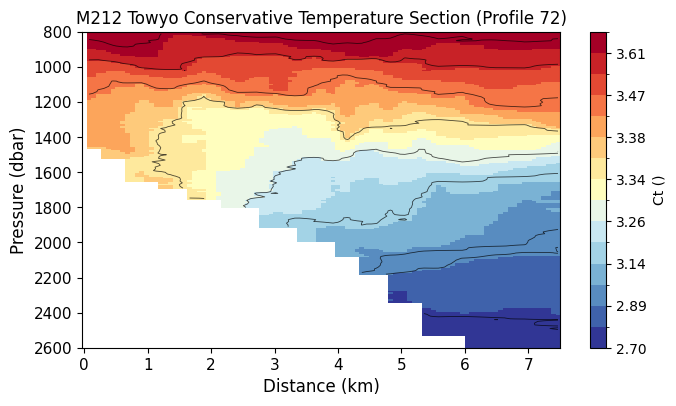

In [4]:
# Create a conservative temperature section plot with sigma2 contours
fig, ax = plot_section(
    ds,
    variable="CT",
    sigma2_contours=True,
    figsize=(7, 4)
)
ax.set_title("M212 Towyo Conservative Temperature Section (Profile 72)")
plt.show()

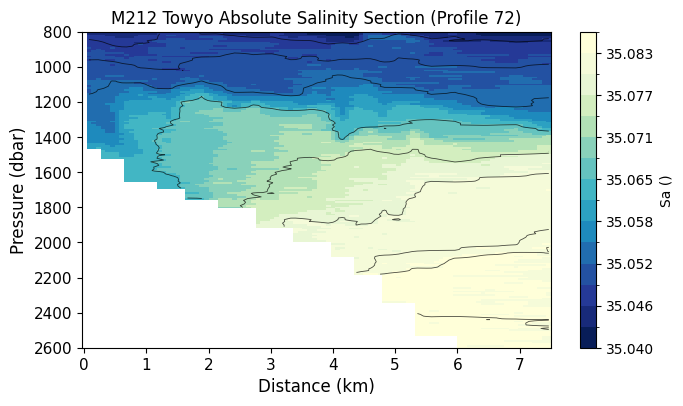

In [5]:
# Create an absolute salinity section plot with sigma2 contours
fig, ax = plot_section(
    ds,
    variable="SA",
    sigma2_contours=True,
    figsize=(7, 4)
)
ax.set_title("M212 Towyo Absolute Salinity Section (Profile 72)")
plt.show()

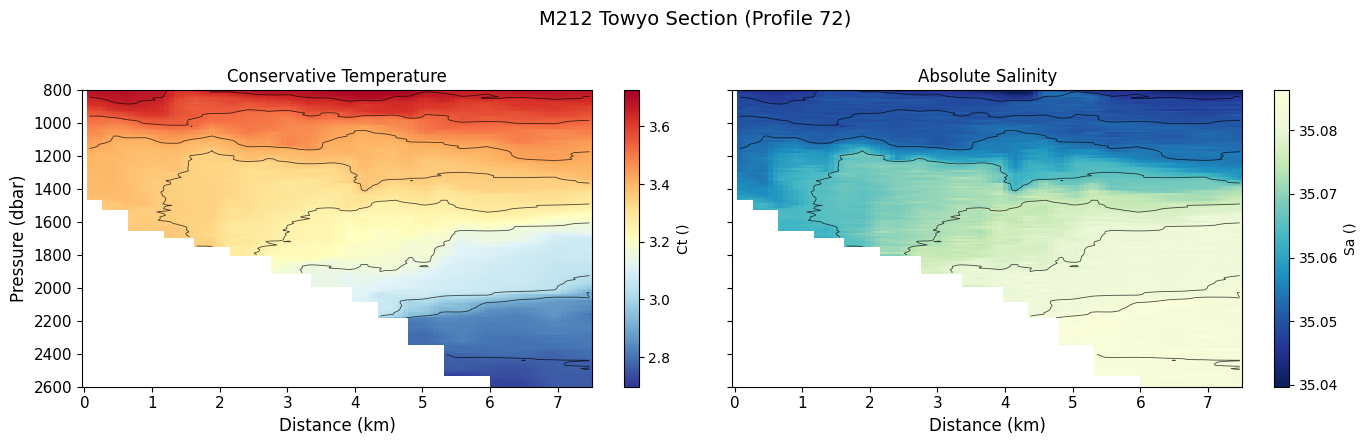

In [6]:
# Create dual section plot (CT left, SA right) with sigma2 contours
fig, (ax1, ax2) = plot_dual_section(
    ds,
    left_var="CT",
    right_var="SA",
    sigma2_contours=True,
    figsize=(14, 4)
)
ax1.set_title("Conservative Temperature")
ax2.set_title("Absolute Salinity")
fig.suptitle("M212 Towyo Section (Profile 72)", fontsize=14, y=1.1)
plt.show()

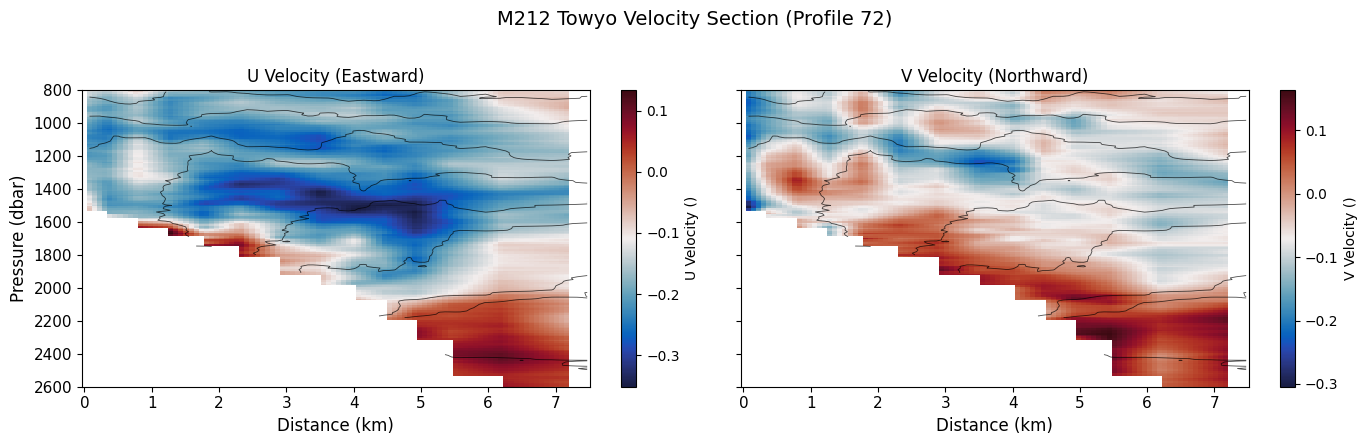

In [7]:
# Create velocity section plots
fig, (ax1, ax2) = plot_dual_section(
    ds,
    left_var="u_velocity",
    right_var="v_velocity",
    sigma2_contours=True,  # Skip density contours for velocity
    figsize=(14, 4)
)
ax1.set_title("U Velocity (Eastward)")
ax2.set_title("V Velocity (Northward)")
fig.suptitle("M212 Towyo Velocity Section (Profile 72)", fontsize=14, y=1.1)
plt.show()